### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import sklearn
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time
%matplotlib inline

### Importing the dataset

In [2]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [3]:
train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [5]:
train.dtypes[train.dtypes=='object']

proto          object
saddr          object
sport          object
daddr          object
dport          object
category       object
subcategory    object
dtype: object

In [6]:
train['category'].value_counts()

DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: category, dtype: int64

In [7]:
train.groupby(['category','subcategory']).count()

pkSeqID   proto   saddr   sport   daddr  \
category       subcategory                                                  
DDoS           HTTP                   786     786     786     786     786   
               TCP                 782228  782228  782228  782228  782228   
               UDP                 758301  758301  758301  758301  758301   
DoS            HTTP                  1184    1184    1184    1184    1184   
               TCP                 492615  492615  492615  492615  492615   
               UDP                 826349  826349  826349  826349  826349   
Normal         Normal                 370     370     370     370     370   
Reconnaissance OS_Fingerprint       14293   14293   14293   14293   14293   
               Service_Scan         58626   58626   58626   58626   58626   
Theft          Data_Exfiltration        6       6       6       6       6   
               Keylogging              59      59      59      59      59   

                                   dport     seq  stddev  N_IN_Conn_P_SrcIP  \
category       subcategory                                                    
DDoS           HTTP                  786     786     786                786   
               TCP                782228  782228  782228             782228   
               UDP                758301  758301  758301             758301   
DoS            HTTP                 1184    1184    1184               1184   
               TCP                492615  492615  492615             492615   
               UDP                826349  826349  826349             826349   
Normal         Normal                370     370     370                370   
Reconnaissance OS_Fingerprint      14293   14293   14293              14293   
               Service_Scan        58626   58626   58626              58626   
Theft          Data_Exfiltration       6       6       6                  6   
               Keylogging             59      59      59                 59   

                                     min  state_number    mean  \
category       subcategory                                       
DDoS           HTTP                  786           786     786   
               TCP                782228        782228  782228   
               UDP                758301        758301  758301   
DoS            HTTP                 1184          1184    1184   
               TCP                492615        492615  492615   
               UDP                826349        826349  826349   
Normal         Normal                370           370     370   
Reconnaissance OS_Fingerprint      14293         14293   14293   
               Service_Scan        58626         58626   58626   
Theft          Data_Exfiltration       6             6       6   
               Keylogging             59            59      59   

                                  N_IN_Conn_P_DstIP   drate   srate     max  \
category       subcategory                                                    
DDoS           HTTP                             786     786     786     786   
               TCP                           782228  782228  782228  782228   
               UDP                           758301  758301  758301  758301   
DoS            HTTP                            1184    1184    1184    1184   
               TCP                           492615  492615  492615  492615   
               UDP                           826349  826349  826349  826349   
Normal         Normal                           370     370     370     370   
Reconnaissance OS_Fingerprint                 14293   14293   14293   14293   
               Service_Scan                   58626   58626   58626   58626   
Theft          Data_Exfiltration                  6       6       6       6   
               Keylogging                        59      59      59      59   

                                  attack  
category       subcategory                
DDoS           HTTP            

In [8]:
train.groupby(['category'])['subcategory'].value_counts()

category        subcategory      
DDoS            TCP                  782228
                UDP                  758301
                HTTP                    786
DoS             UDP                  826349
                TCP                  492615
                HTTP                   1184
Normal          Normal                  370
Reconnaissance  Service_Scan          58626
                OS_Fingerprint        14293
Theft           Keylogging               59
                Data_Exfiltration         6
Name: subcategory, dtype: int64

In [9]:
train['target'] = train['category'] + "_" + train['subcategory']
train.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP,DDoS_UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP,DDoS_TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP,DDoS_TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP,DoS_UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP,DDoS_UDP


<AxesSubplot:xlabel='target', ylabel='count'>

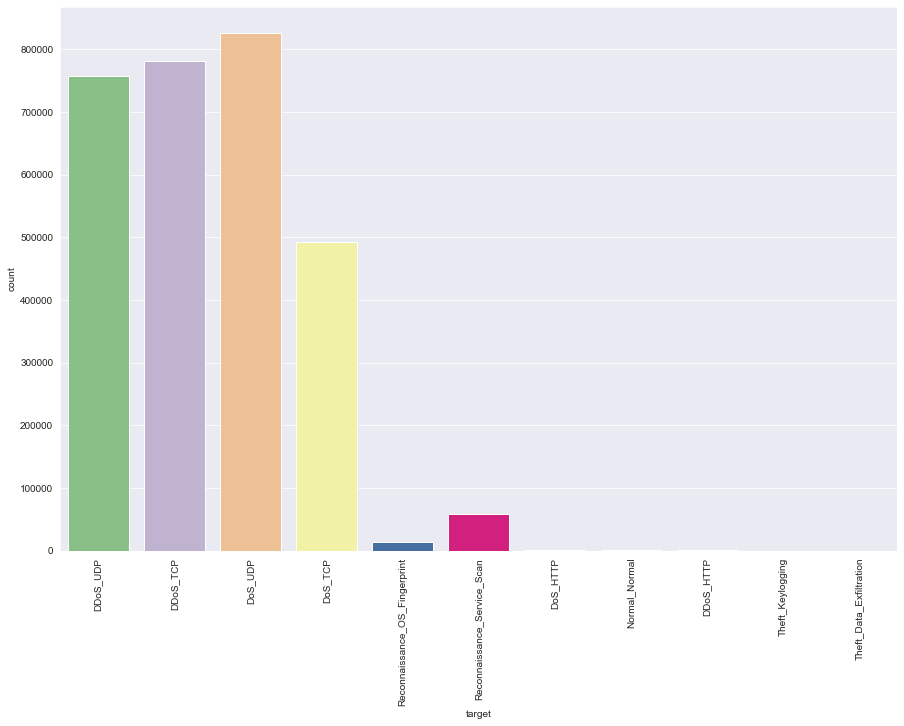

In [10]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(train['target'],palette='Accent')

In [11]:
index_names = train[train['category']=='Theft'].index
print(index_names)
train.drop(index_names , inplace=True)

#index_names = train[train['category']=="Reconnaissance"].index
#print(index_names)
#train.drop(index_names , inplace=True)

Int64Index([  82824,  200273,  297735,  299517,  439998,  510517,  583487,
             611540,  637420,  700096,  723797,  724359,  755409,  792753,
             821536,  909747,  958761,  969967,  999617, 1030613, 1046268,
            1072699, 1095917, 1117499, 1125650, 1130318, 1138262, 1305570,
            1417486, 1474071, 1559125, 1615411, 1685222, 1750209, 1862024,
            1875784, 1881092, 1889632, 1900475, 1926714, 1957601, 1982151,
            1991611, 1992183, 2016671, 2031461, 2042058, 2074145, 2113025,
            2191890, 2193606, 2333450, 2377581, 2445558, 2481626, 2482599,
            2525637, 2556441, 2564902, 2599356, 2725160, 2727538, 2752287,
            2764340, 2919405],
           dtype='int64')


In [12]:
index_names = test[test['category']=='Theft'].index
print(index_names)
test.drop(index_names , inplace=True)
#index_names = test[test['category']=='Reconnaissance'].index
#print(index_names)
#test.drop(index_names , inplace=True)

Int64Index([  5469,  54757, 154917, 256550, 292157, 310304, 340337, 364471,
            410069, 411108, 475177, 490783, 534964, 619391],
           dtype='int64')


In [13]:
train.groupby(['category','subcategory']).count()

pkSeqID   proto   saddr   sport   daddr  \
category       subcategory                                               
DDoS           HTTP                786     786     786     786     786   
               TCP              782228  782228  782228  782228  782228   
               UDP              758301  758301  758301  758301  758301   
DoS            HTTP               1184    1184    1184    1184    1184   
               TCP              492615  492615  492615  492615  492615   
               UDP              826349  826349  826349  826349  826349   
Normal         Normal              370     370     370     370     370   
Reconnaissance OS_Fingerprint    14293   14293   14293   14293   14293   
               Service_Scan      58626   58626   58626   58626   58626   

                                dport     seq  stddev  N_IN_Conn_P_SrcIP  \
category       subcategory                                                 
DDoS           HTTP               786     786     786                786   
               TCP             782228  782228  782228             782228   
               UDP             758301  758301  758301             758301   
DoS            HTTP              1184    1184    1184               1184   
               TCP             492615  492615  492615             492615   
               UDP             826349  826349  826349             826349   
Normal         Normal             370     370     370                370   
Reconnaissance OS_Fingerprint   14293   14293   14293              14293   
               Service_Scan     58626   58626   58626              58626   

                                  min  state_number    mean  \
category       subcategory                                    
DDoS           HTTP               786           786     786   
               TCP             782228        782228  782228   
               UDP             758301        758301  758301   
DoS            HTTP              1184          1184    1184   
               TCP             492615        492615  492615   
               UDP             826349        826349  826349   
Normal         Normal             370           370     370   
Reconnaissance OS_Fingerprint   14293         14293   14293   
               Service_Scan     58626         58626   58626   

                               N_IN_Conn_P_DstIP   drate   srate     max  \
category       subcategory                                                 
DDoS           HTTP                          786     786     786     786   
               TCP                        782228  782228  782228  782228   
               UDP                        758301  758301  758301  758301   
DoS            HTTP                         1184    1184    1184    1184   
               TCP                        492615  492615  492615  492615   
               UDP                        826349  826349  826349  826349   
Normal         Normal                        370     370     370     370   
Reconnaissance OS_Fingerprint              14293   14293   14293   14293   
               Service_Scan                58626   58626   58626   58626   

                               attack  target  
category       subcategory                     
DDoS           HTTP               786     786  
               TCP             782228  782228  
               UDP             758301  758301  
DoS            HTTP              1184    1184  
               TCP             492615  492615  
               UDP             826349  826349  
Normal         Normal             370     370  
Reconnaissance OS_Fingerprint   14293   14293  
               Service_Scan     58626   58626

In [14]:
test['target'] = test['category'] + "_" + test['subcategory']
test.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP,DoS_UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP,DDoS_TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP,DDoS_UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP,DDoS_TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP,DoS_TCP


### Dropping unwanted attributes

In [15]:
train.drop(["pkSeqID","seq"], axis=1, inplace=True)
test.drop(["pkSeqID","seq"], axis=1, inplace=True)

In [16]:
train[train['category']=='Normal']

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory,target
3377,tcp,192.168.100.5,0,192.168.100.3,0,0.235357,7,0.598172,2,4.898582,7,0.000000,10.932437,4.999866,0,Normal,Normal,Normal_Normal
7683,udp,192.168.100.150,46295,192.168.217.2,53,0.000000,11,0.000000,4,0.000000,20,0.000000,0.400001,0.000000,0,Normal,Normal,Normal_Normal
8844,tcp,192.168.100.3,80,192.168.100.55,8080,0.228494,20,0.768694,2,4.947914,2,17.633553,17.634146,4.999863,0,Normal,Normal,Normal_Normal
10110,udp,192.168.100.147,38275,192.168.217.2,53,0.000000,18,0.000000,4,0.000000,18,0.000000,0.399866,0.000000,0,Normal,Normal,Normal_Normal
16479,udp,192.168.100.150,56155,255.255.255.255,3289,0.000000,14,0.000000,4,0.000000,2,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896922,udp,192.168.100.3,60946,192.31.80.30,53,0.000000,23,0.278547,2,0.278547,1,0.000000,0.000000,0.278547,0,Normal,Normal,Normal_Normal
2907572,ipv6-icmp,fe80::250:56ff:febe:c038,133,ff02::2,0,0.000000,1,0.000000,8,0.000000,3,0.000000,0.000000,0.000000,0,Normal,Normal,Normal_Normal
2912220,udp,192.168.100.4,60001,192.168.100.1,53,0.323125,7,0.000000,2,0.161776,4,0.555538,0.644334,0.808025,0,Normal,Normal,Normal_Normal
2917520,udp,192.168.100.148,41735,8.8.8.8,53,0.000000,20,0.007598,2,0.007598,15,0.000000,0.000000,0.007598,0,Normal,Normal,Normal_Normal


In [17]:
train['sport'].value_counts()

0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
56775       31
39305       30
18992       30
0x000d      10
0x0011       8
Name: sport, Length: 65541, dtype: int64

In [18]:
check='0x'
s_res = set([i for i in train['sport'] if i.startswith(check)])

train['sport']=train['sport'].replace(['0x0303'],'771') 
train['sport']=train['sport'].replace(['0x0011'],'17')
train['sport']=train['sport'].replace(['0x000d'],'13')
train['sport']=train['sport'].replace(['0x0008'],'8')

test['sport']=test['sport'].replace(['0x0303'],'771') 
test['sport']=test['sport'].replace(['0x0011'],'17')
test['sport']=test['sport'].replace(['0x000d'],'13')
test['sport']=test['sport'].replace(['0x0008'],'8')

In [19]:
train["sport"] = train["sport"].astype(str).astype(int)
test["sport"] = test["sport"].astype(str).astype(int)

In [20]:
check='0x'
d_res = set([i for i in train['dport'] if i.startswith(check)])
print(len(d_res))

1062


In [21]:
train["dport"] = train["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))
test["dport"] = test["dport"].apply(lambda x: int(x,16) if len(x)>1 and x[1]=="x" else int(x))

In [22]:
train['dport'].value_counts()

 80       2858794
 1           5379
 3306        3757
 53           275
-1            163
           ...   
 40064          1
 40027          1
 40344          1
 3754           1
 61804          1
Name: dport, Length: 6778, dtype: int64

In [23]:
test["state_number"].value_counts()

4     399567
3     175672
1     154830
5       1794
6       1200
7        479
2        117
9         16
11         8
10         6
8          2
Name: state_number, dtype: int64

In [24]:
len(train[train['dport']<0]['dport'])

163

In [25]:
train[train['dport']==-1]['target'].value_counts()

Normal_Normal                    38
Reconnaissance_Service_Scan      34
Reconnaissance_OS_Fingerprint    26
DoS_UDP                          18
DoS_TCP                          17
DDoS_TCP                         15
DDoS_UDP                         10
DoS_HTTP                          5
Name: target, dtype: int64

In [26]:
#Since dport can't be negative, we are dropping it
index_names = train[train['dport'] == -1].index
train.drop(index_names, inplace=True)

In [27]:
test[test['dport']==-1]['target'].value_counts()

Reconnaissance_Service_Scan      12
Normal_Normal                     9
Reconnaissance_OS_Fingerprint     6
DoS_UDP                           6
DDoS_UDP                          6
DDoS_TCP                          3
DoS_TCP                           2
DoS_HTTP                          1
DDoS_HTTP                         1
Name: target, dtype: int64

In [28]:
index_names = test[test['dport']==-1].index
test.drop(index_names , inplace=True)

In [29]:
train['target'].value_counts()

DoS_UDP                          826331
DDoS_TCP                         782213
DDoS_UDP                         758291
DoS_TCP                          492598
Reconnaissance_Service_Scan       58592
Reconnaissance_OS_Fingerprint     14267
DoS_HTTP                           1179
DDoS_HTTP                           786
Normal_Normal                       332
Name: target, dtype: int64

In [30]:
train.dtypes[train.dtypes=='object']

proto          object
saddr          object
daddr          object
category       object
subcategory    object
target         object
dtype: object

In [31]:
train.drop(["category","subcategory"], axis=1, inplace=True)
test.drop(["category","subcategory"], axis=1, inplace=True)

### Encoding Categorical columns

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["saddr_enc"]= le.fit_transform(train.saddr)
train["daddr_enc"]= le.fit_transform(train.daddr)
train["proto_enc"]= le.fit_transform(train.proto)
train["target_enc"]= le.fit_transform(train.target)

In [33]:
train.head()

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,target,saddr_enc,daddr_enc,proto_enc,target_enc
0,udp,192.168.100.150,6551,192.168.100.3,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS_UDP,3,14,3,2
1,tcp,192.168.100.150,5532,192.168.100.3,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS_TCP,3,14,2,1
2,tcp,192.168.100.147,27165,192.168.100.3,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS_TCP,0,14,2,1
3,udp,192.168.100.150,48719,192.168.100.3,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS_UDP,3,14,3,5
4,udp,192.168.100.147,22461,192.168.100.3,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS_UDP,0,14,3,2


### Dropping Redundant Columns

In [34]:
train.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)

In [35]:
test["saddr_enc"]= le.fit_transform(test.saddr)
test["daddr_enc"]= le.fit_transform(test.daddr)
test["proto_enc"]= le.fit_transform(test.proto)
test["target_enc"]= le.fit_transform(test.target)
test.drop(['saddr','daddr','proto','target'], axis=1, inplace=True)


In [36]:
train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc,target_enc
0,6551,80,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,3,14,3,2
1,5532,80,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,3,14,2,1
2,27165,80,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,0,14,2,1
3,48719,80,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,3,14,3,5
4,22461,80,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,0,14,3,2


In [37]:
train['target_enc'].value_counts()

5    826331
1    782213
2    758291
4    492598
8     58592
7     14267
3      1179
0       786
6       332
Name: target_enc, dtype: int64

* DoS_UDP        -  5
* DDoS_TCP       -  1
* DDoS_UDP       -  2
* DoS_TCP        -  4 
* DoS_HTTP       -  3 
* DDoS_HTTP      -  0 
* Normal_Normal  -  6

### Scaling

In [38]:
y = train['target_enc']

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
features = train.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
train= pd.DataFrame(scaled_features,columns=cols)

In [40]:
train.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,-1.380968,-0.094032,1.260943,0.715432,-0.685675,0.729274,0.301061,0.415148,-0.00763,-0.003355,0.543937,0.010637,1.302349,-0.643845,0.898098
1,-1.434281,-0.094032,-1.006704,-1.827146,1.914094,-0.113134,1.122958,0.415148,-0.00763,-0.003659,0.533890,0.010637,1.302349,-0.643845,-1.050938
2,-0.302458,-0.094032,-0.769453,0.715432,1.319021,-0.113134,0.731911,0.415148,-0.00763,-0.003610,0.316934,0.010637,-1.281797,-0.643845,-1.050938
3,0.825232,-0.094032,1.164907,-0.801913,-0.685675,0.729274,0.653770,-1.622798,-0.00763,-0.003397,1.033331,0.010637,1.302349,-0.643845,0.898098
4,-0.548568,-0.094032,-0.080394,0.715432,1.322995,0.729274,1.154778,0.415148,-0.00763,-0.002707,1.061356,0.010637,-1.281797,-0.643845,0.898098


In [41]:
ytest = test['target_enc']
features = test.iloc[:,:-1]
cols=features.columns
scaled_features= scaler.fit_transform(features)
test= pd.DataFrame(scaled_features,columns=cols)

In [42]:
test.head()

,sport,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,saddr_enc,daddr_enc,proto_enc
0,0.815980,-0.094347,-0.822350,0.716722,2.076170,0.728973,1.465443,0.415659,-0.006811,-0.004605,0.911656,0.011558,1.303394,-0.667508,0.896919
1,-0.556663,-0.094347,-0.542236,0.716722,1.630704,-1.799696,1.036313,0.415659,-0.003783,-0.004613,0.763047,0.011558,-0.422688,-0.667508,-1.051749
2,-0.223974,-0.094347,1.297989,-0.388902,-0.686481,0.728973,0.327939,0.415659,-0.006811,-0.004599,0.599406,0.011558,0.440353,-0.667508,0.896919
3,0.482664,-0.094347,-0.571091,-1.085035,1.517618,-1.799696,0.917867,0.415659,-0.006811,-0.004757,0.648446,0.011558,-0.422688,-0.667508,-1.051749
4,-1.635053,-0.094347,1.455734,0.716722,-0.686481,-0.113916,-0.688722,0.415659,-0.006811,-0.005272,0.930031,0.011558,0.440353,0.636049,-1.051749


In [43]:
x = train
xtest = test

### Sampling

In [44]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 8:58592, 7:14267, 3:1179, 0:786, 6:332}
#samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 3:1179, 0:786, 6:332}
random_under= RandomUnderSampler(sampling_strategy=samp_strat,random_state=1)
X_rus,y_rus = random_under.fit_resample(x,y)

In [45]:
pd.Series(y_rus).value_counts()

1    70000
2    70000
5    70000
4    65000
8    58592
7    14267
3     1179
0      786
6      332
Name: target_enc, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler
samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 8:58592, 7:30000, 3:20000, 0:15000, 6:8000}
#samp_strat= {5:70000, 1:70000, 2:70000, 4:65000, 3:20000, 0:15000, 6:8000}
random_under= RandomOverSampler(sampling_strategy=samp_strat,random_state=1)
Xres,yres = random_under.fit_resample(X_rus,y_rus)

<AxesSubplot:xlabel='target_enc', ylabel='count'>

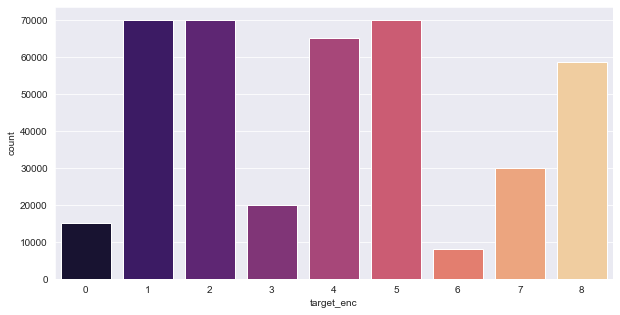

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(yres,palette='magma')

In [48]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, classification_report, f1_score
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xres,yres, test_size=0.40)

## Decision Tree

In [49]:
scores_gini = []
print('Accuracy score for values of max_depth of a decision tree are :')
print('Max Depth     Accuracy Score')
for i in range(1,7):
  dtree_test_gini = DecisionTreeClassifier(criterion='gini',max_depth=i)
  dtree_test_gini.fit(X_train,y_train)
  scores_gini.append(dtree_test_gini.score(X_test,y_test))
  print(i,'          ', scores_gini[i-1])

print(
    'We got maximum accuracy for max_depth=', 
    scores_gini.index(max(scores_gini))+1, 
    'and the maximum accuracy is: ', max(scores_gini)
)

Accuracy score for values of max_depth of a decision tree are :
Max Depth     Accuracy Score
1            0.34453414659640796
2            0.5768121645136101
3            0.7692898909842164
4            0.8387574783105936
5            0.8777092543517158
6            0.9426083855457246
We got maximum accuracy for max_depth= 6 and the maximum accuracy is:  0.9426083855457246


In [50]:
model_1 = DecisionTreeClassifier(max_depth=6)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [55]:

start_time = time.time()
for i in range(100):
    pred_1= model_1.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
score1 = model_1.score(X_test, y_test)
print("Accuracy of base model: ",score1)
print(classification_report(y_test, pred_1, target_names = ['DoS_UDP','DDoS_TCP', 'DDoS_UDP', 'Service_Scan', 'OS_Fingerprint','DoS_TCP', 'DoS_HTTP', 'DDoS_HTTP', 'Normal_Normal']))

--- 1.4833080768585205 seconds ---
Accuracy of base model:  0.9426206828704415
                precision    recall  f1-score   support

       DoS_UDP       0.91      0.98      0.94      6038
      DDoS_TCP       0.91      0.97      0.94     28155
      DDoS_UDP       1.00      0.98      0.99     27879
  Service_Scan       0.99      0.99      0.99      7938
OS_Fingerprint       0.99      0.99      0.99     26186
       DoS_TCP       0.98      1.00      0.99     28044
      DoS_HTTP       0.97      0.95      0.96      3147
     DDoS_HTTP       0.99      0.57      0.73     11984
 Normal_Normal       0.81      0.90      0.85     23266

      accuracy                           0.94    162637
     macro avg       0.95      0.93      0.93    162637
  weighted avg       0.95      0.94      0.94    162637



In [53]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,pred_1)

array([[[155999,    600],
        [   110,   5928]],

       [[131866,   2616],
        [   799,  27356]],

       [[134752,      6],
        [   475,  27404]],

       [[154626,     73],
        [    98,   7840]],

       [[136086,    365],
        [   248,  25938]],

       [[134118,    475],
        [     6,  28038]],

       [[159399,     91],
        [   159,   2988]],

       [[150582,     71],
        [  5128,   6856]],

       [[134336,   5035],
        [  2309,  20957]]])

## Naive Bayes


In [85]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()


In [86]:
from sklearn.metrics import accuracy_score
model_2.fit(X_train,y_train)
start_time = time.time()
for i in range(1000):
    predict_2 = model_2.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))
score2 = model_2.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, predict_2)
print(classification_report(y_test, predict_2, target_names = ['DoS_UDP','DDoS_TCP', 'DDoS_UDP', 'Service_Scan', 'OS_Fingerprint','DoS_TCP', 'DoS_HTTP', 'DDoS_HTTP', 'Normal_Normal']))
print('Accuracy score on test dataset : ', test_accuracy*100,'%')

--- 57.7440447807312 seconds ---
                precision    recall  f1-score   support

       DoS_UDP       0.34      0.96      0.50      3002
      DDoS_TCP       0.85      0.53      0.65     13968
      DDoS_UDP       0.86      1.00      0.93     13980
  Service_Scan       0.74      0.53      0.61      4009
OS_Fingerprint       0.50      0.89      0.64     12952
       DoS_TCP       1.00      0.84      0.92     14067
      DoS_HTTP       1.00      1.00      1.00      1609
     DDoS_HTTP       0.56      0.27      0.37      5953
 Normal_Normal       0.95      0.46      0.62     11779

      accuracy                           0.72     81319
     macro avg       0.76      0.72      0.69     81319
  weighted avg       0.79      0.72      0.72     81319

Accuracy score on test dataset :  71.88233992055977 %


## Logistic Regression

In [87]:
import time

from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(X_train, y_train)
start = time.time()
for i in range(1000):
    pred_3 = model_3.predict(X_test)
end = time.time()
print(end - start, "seconds\n")
score3 = model_3.score(X_test, y_test)

print("Accuracy of base model: ",score3)

7.819307088851929 seconds

Accuracy of base model:  0.8801756047172248


In [88]:
pred_3b = model_3.predict(xtest)
score3b = model_3.score(xtest,ytest)
print("Accuracy of test model: ",score3b)
print(classification_report(ytest,pred_3b, target_names = ['DoS_UDP','DDoS_TCP', 'DDoS_UDP', 'Service_Scan', 'OS_Fingerprint','DoS_TCP', 'DoS_HTTP', 'DDoS_HTTP', 'Normal_Normal']))


Accuracy of test model:  0.9649135481056914
                precision    recall  f1-score   support

       DoS_UDP       0.02      0.66      0.04       202
      DDoS_TCP       0.99      0.93      0.96    195149
      DDoS_UDP       1.00      1.00      1.00    189948
  Service_Scan       0.02      0.47      0.04       300
OS_Fingerprint       0.96      0.95      0.96    123183
       DoS_TCP       1.00      1.00      1.00    206620
      DoS_HTTP       1.00      1.00      1.00        98
     DDoS_HTTP       0.46      0.68      0.55      3615
 Normal_Normal       0.80      0.69      0.74     14530

      accuracy                           0.96    733645
     macro avg       0.69      0.82      0.70    733645
  weighted avg       0.98      0.96      0.97    733645



In [89]:
from sklearn.metrics import recall_score
print(recall_score(ytest, pred_3b, average=None))
print('\n',f1_score(ytest, pred_3b, average=None))

[0.66336634 0.93475242 0.99690968 0.47       0.94700567 0.99973865
 1.         0.67717842 0.69408121]

 [0.03851128 0.96306718 0.99831822 0.03595105 0.95521374 0.99837363
 1.         0.54630663 0.74450022]


## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors = 4)
model_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
start = time.time()
for i in range(1):
    Y_pred_4 = model_4.predict(X_test) 
end = time.time()
print(end - start, "seconds\n")
test_accuracy_knn = accuracy_score(y_test, Y_pred_4)
print('Accuracy score on test dataset : ', test_accuracy_knn*100,'%')

166.49346208572388 seconds

Accuracy score on test dataset :  99.49396508789513 %


In [59]:
print("Classification Report:",)
print(classification_report(y_test, Y_pred_4, target_names = ['DoS_UDP','DDoS_TCP', 'DDoS_UDP', 'Service_Scan', 'OS_Fingerprint','DoS_TCP', 'DoS_HTTP', 'DDoS_HTTP', 'Normal_Normal']))

Classification Report:
                precision    recall  f1-score   support

       DoS_UDP       1.00      1.00      1.00      2893
      DDoS_TCP       1.00      1.00      1.00     13988
      DDoS_UDP       1.00      1.00      1.00     14065
  Service_Scan       1.00      1.00      1.00      3942
OS_Fingerprint       1.00      1.00      1.00     13075
       DoS_TCP       1.00      1.00      1.00     14017
      DoS_HTTP       1.00      1.00      1.00      1576
     DDoS_HTTP       0.95      0.99      0.97      5990
 Normal_Normal       1.00      0.97      0.98     11773

      accuracy                           1.00     81319
     macro avg       0.99      1.00      0.99     81319
  weighted avg       1.00      1.00      1.00     81319



## Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
model_5 = RandomForestClassifier(n_estimators=6, criterion='entropy')
model_5.fit(X_train, y_train)
start_time = time.time()
for i in range(100):
    y_pred_5 = model_5.predict(X_test)
end = time.time()
print(end - start_time, "seconds\n")

from sklearn.metrics import accuracy_score
print('Model accuracy score with 6 decision-trees :',format(accuracy_score(y_test,y_pred_5)))
print("Classification Report:",)
print(classification_report(y_test, y_pred_5, target_names = ['DoS_UDP','DDoS_TCP', 'DDoS_UDP', 'Service_Scan', 'OS_Fingerprint','DoS_TCP', 'DoS_HTTP', 'DDoS_HTTP', 'Normal_Normal']))

4.281916856765747 seconds

Model accuracy score with 6 decision-trees : 0.9989670310751485
Classification Report:
                precision    recall  f1-score   support

       DoS_UDP       1.00      1.00      1.00      3002
      DDoS_TCP       1.00      1.00      1.00     13968
      DDoS_UDP       1.00      1.00      1.00     13980
  Service_Scan       1.00      1.00      1.00      4009
OS_Fingerprint       1.00      1.00      1.00     12952
       DoS_TCP       1.00      1.00      1.00     14067
      DoS_HTTP       1.00      1.00      1.00      1609
     DDoS_HTTP       0.99      1.00      0.99      5953
 Normal_Normal       1.00      1.00      1.00     11779

      accuracy                           1.00     81319
     macro avg       1.00      1.00      1.00     81319
  weighted avg       1.00      1.00      1.00     81319



#### Therefore the accuracy of Random Forest Classifier is 99.9%

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_5)
print('Confusion matrix:\n\n', cm)

Confusion matrix:

 [[ 2999     0     0     0     0     0     0     0     0]
 [    0 13979     0     0     1     0     0     0     0]
 [    0     0 13986     0     0     0     0     0     0]
 [    0     0     0  4047     0     0     0     0     0]
 [    0     3     0     1 12988     0     0     0     0]
 [    0     0     0     0     0 14025     0     0     0]
 [    0     0     0     0     0     0  1561     0     0]
 [    0     0     0     0     0     0     0  5935    13]
 [    0     0     0     0     0     0     0    24 11757]]


In [80]:
print(f1_score(ytest,pred_3b, average='weighted'))

0.9749031114739249


to_remove    1008146
Normal        193329
DDoS          138777
Name: label, dtype: int64